<a href="https://colab.research.google.com/github/rishabhrawat02r/cryptocurrency-analysis/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading datasets...
Historical data shape: (211224, 16)
Fear/Greed data shape: (2644, 4)

Historical data columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Fear/Greed data columns: ['timestamp', 'value', 'classification', 'date']

Preprocessing data...
Using columns:
- Time column: Timestamp
- PnL column: Closed PnL
- Symbol column: Coin
- Date column: date
- Classification column: classification
✓ Historical data timestamp converted successfully
✓ Fear/Greed data date converted successfully
After date cleaning - Historical: (211224, 18), Fear/Greed: (2644, 5)
Merging datasets...
Sentiment encoding: {'Neutral': np.int64(0)}
Final merged data shape: (211224, 25)
Sentiment distribution:
Classification
Neutral    211224
Name: count, dtype: int64

Generating Visualization 1: Profitability by Sentiment


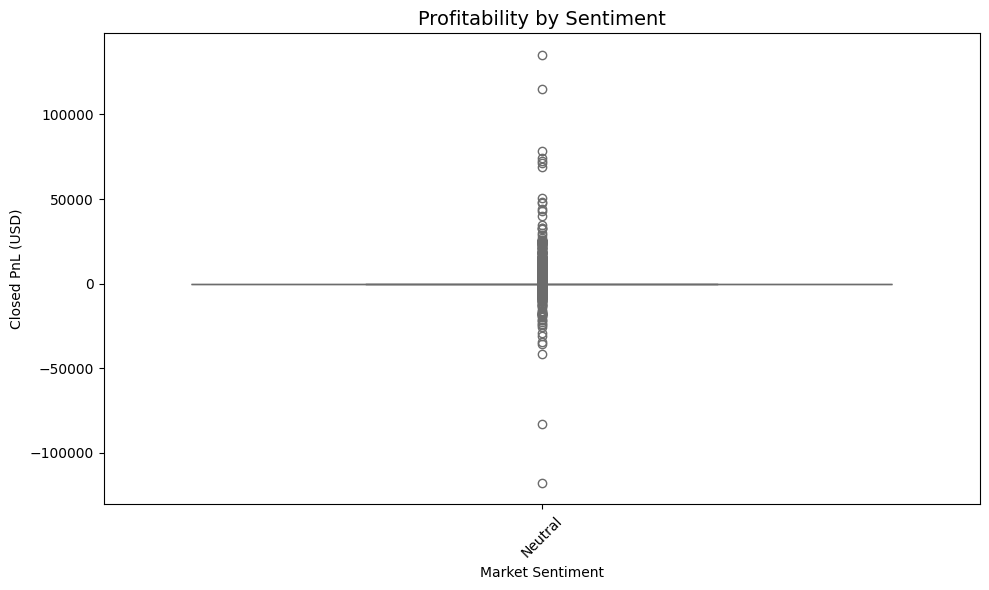


Generating Visualization 2: Win Rate by Sentiment


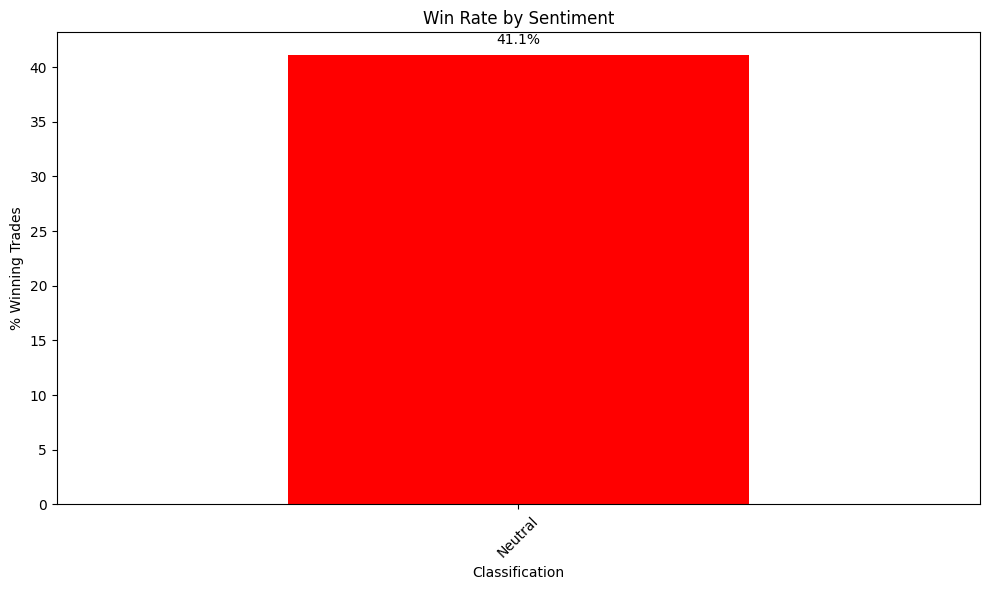


Generating Visualization 3: Symbol Performance Heatmap


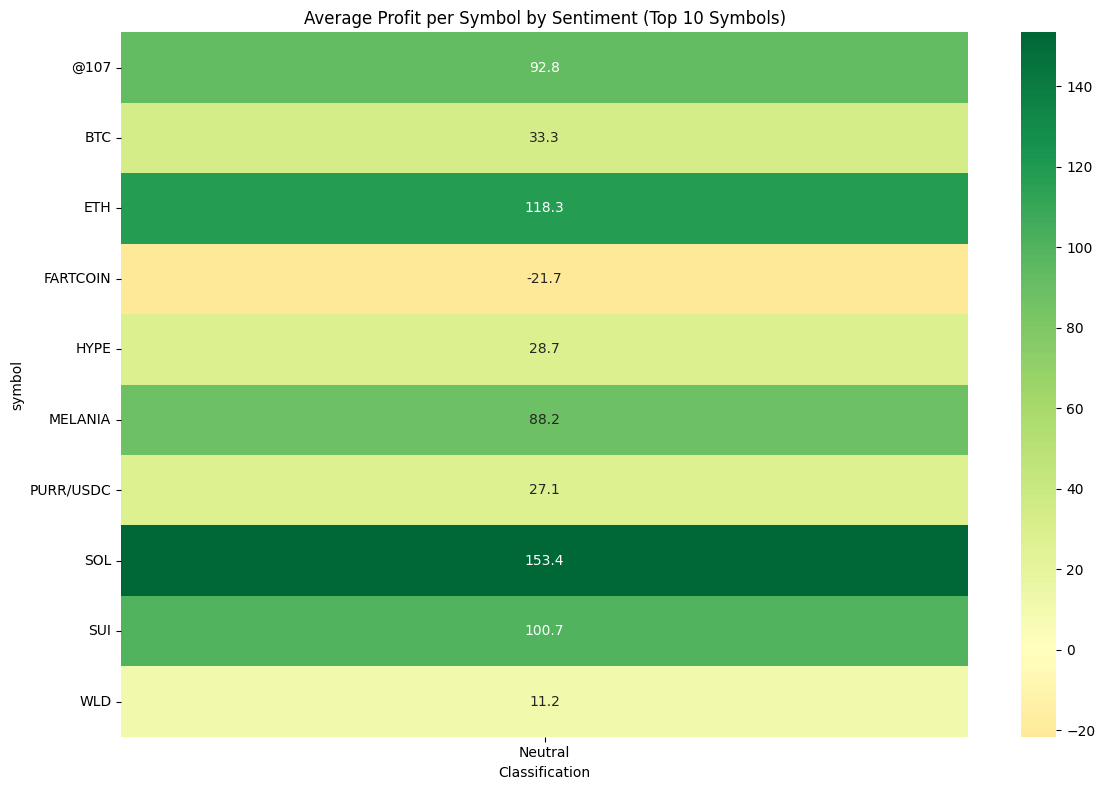


Generating Visualization 4: Time-of-Day Analysis


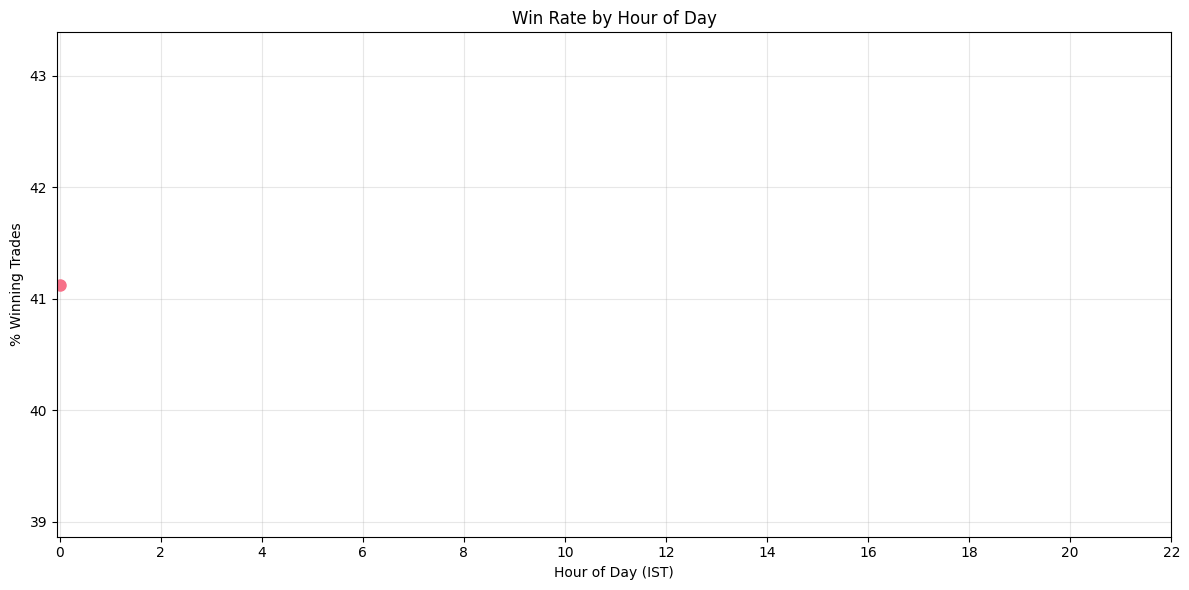


Generating Visualization 5: Position Size vs Performance


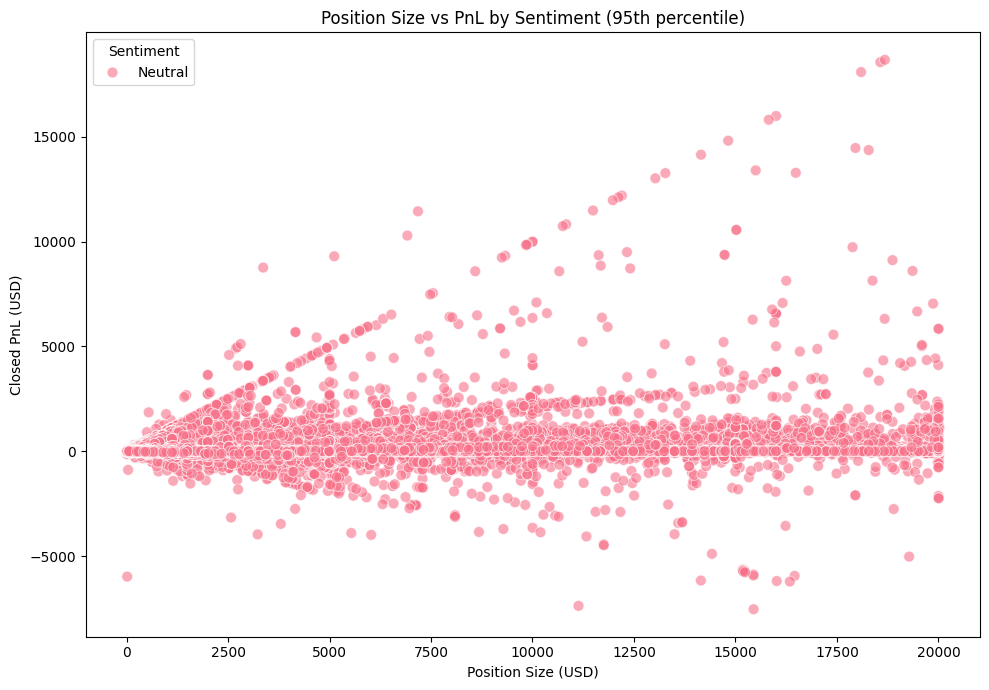


Generating Visualization 6: Position Size Distribution


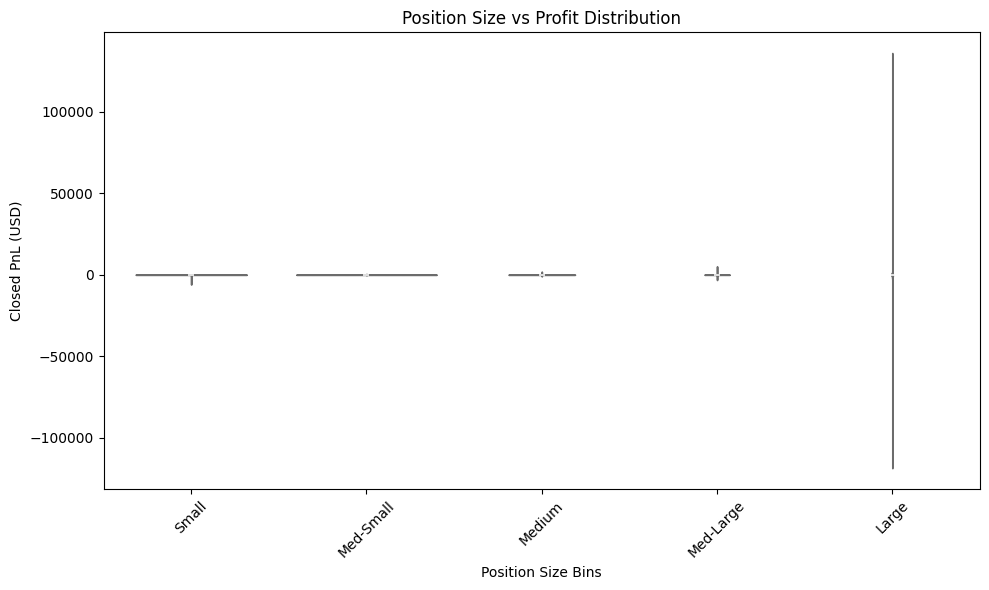


Generating Visualization 7: Rolling PnL Analysis


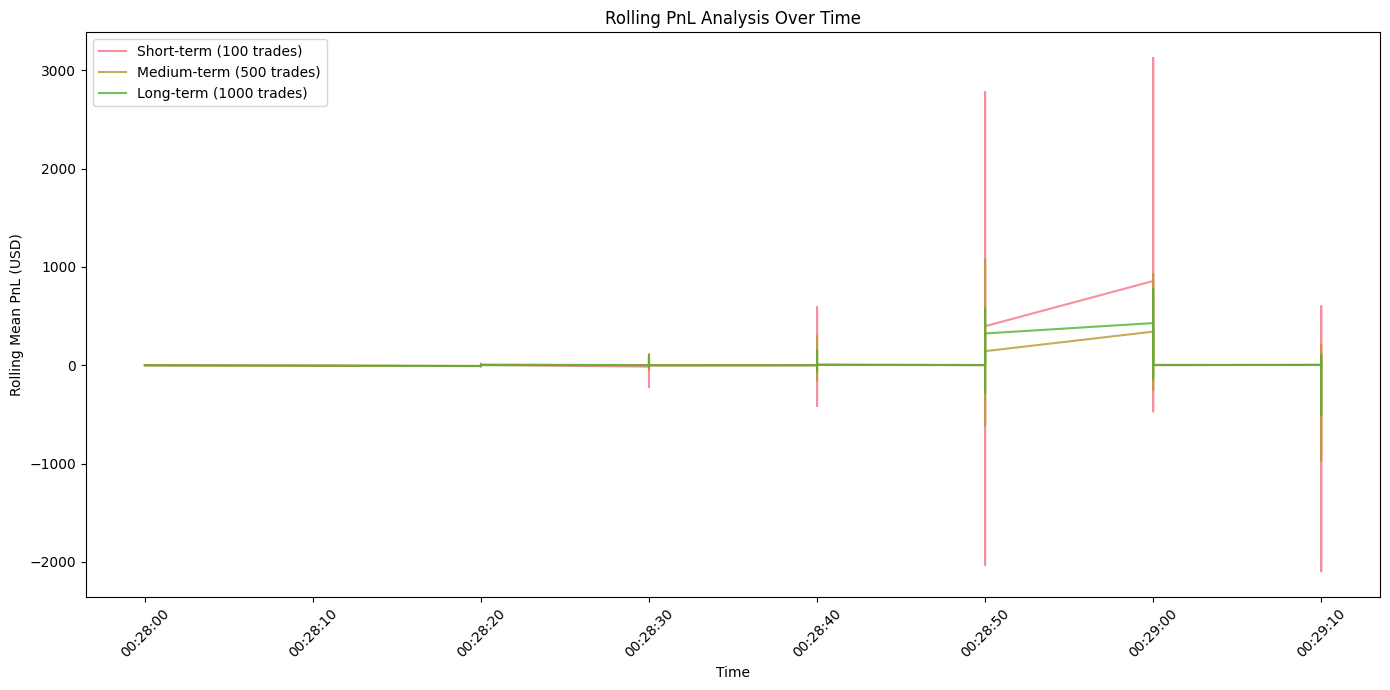


Generating Visualization 8: Account Performance Clustering


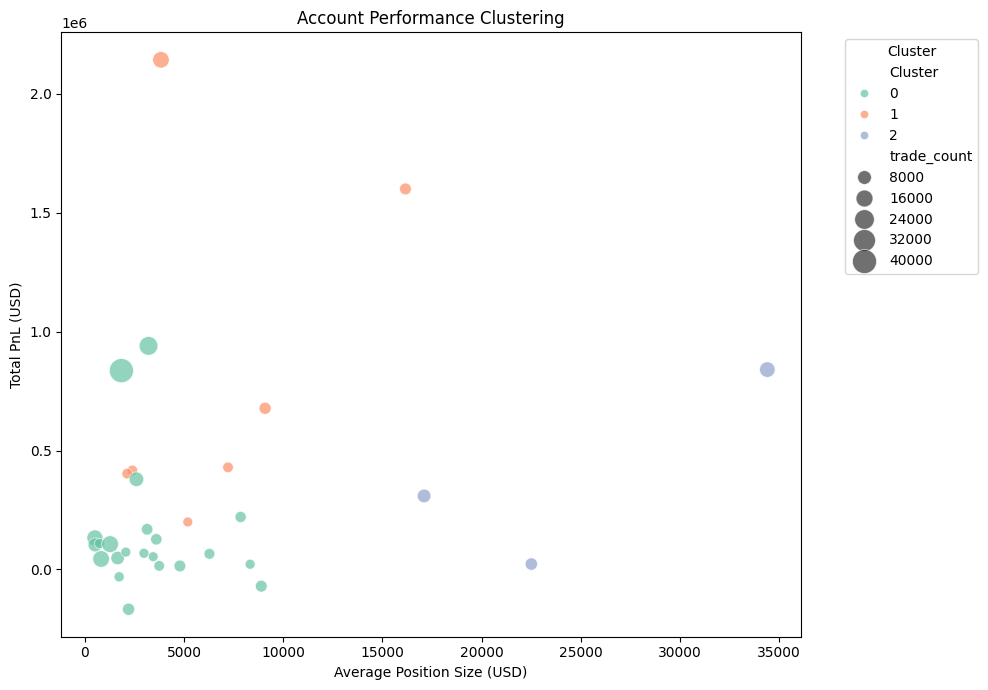


Generating Visualization 9: Correlation Analysis


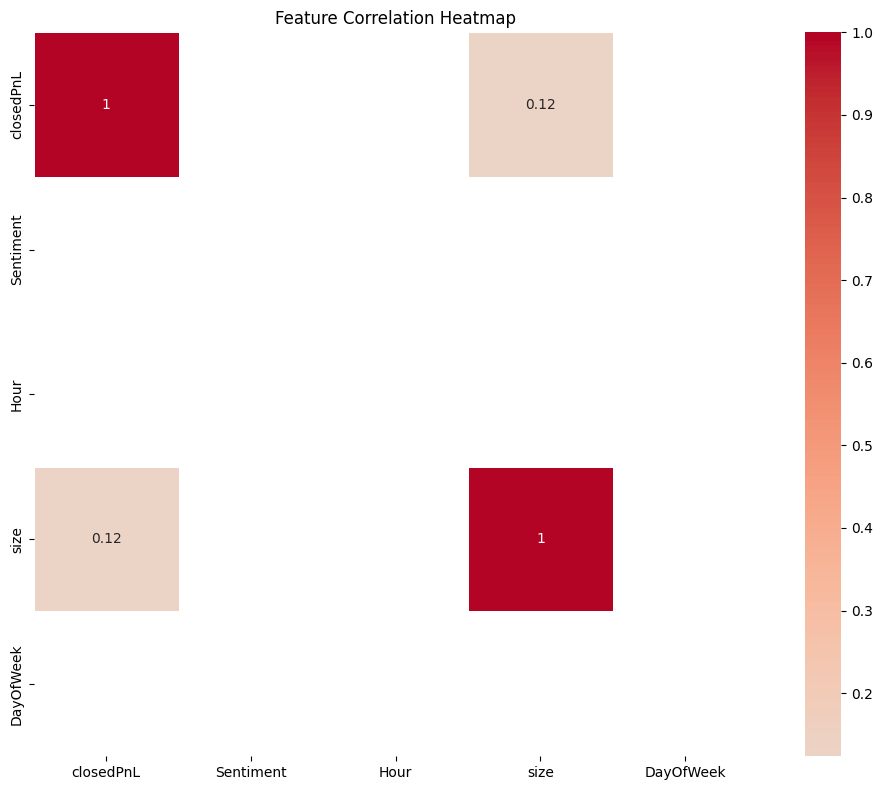


Generating Visualization 10: Comprehensive Sentiment Analysis


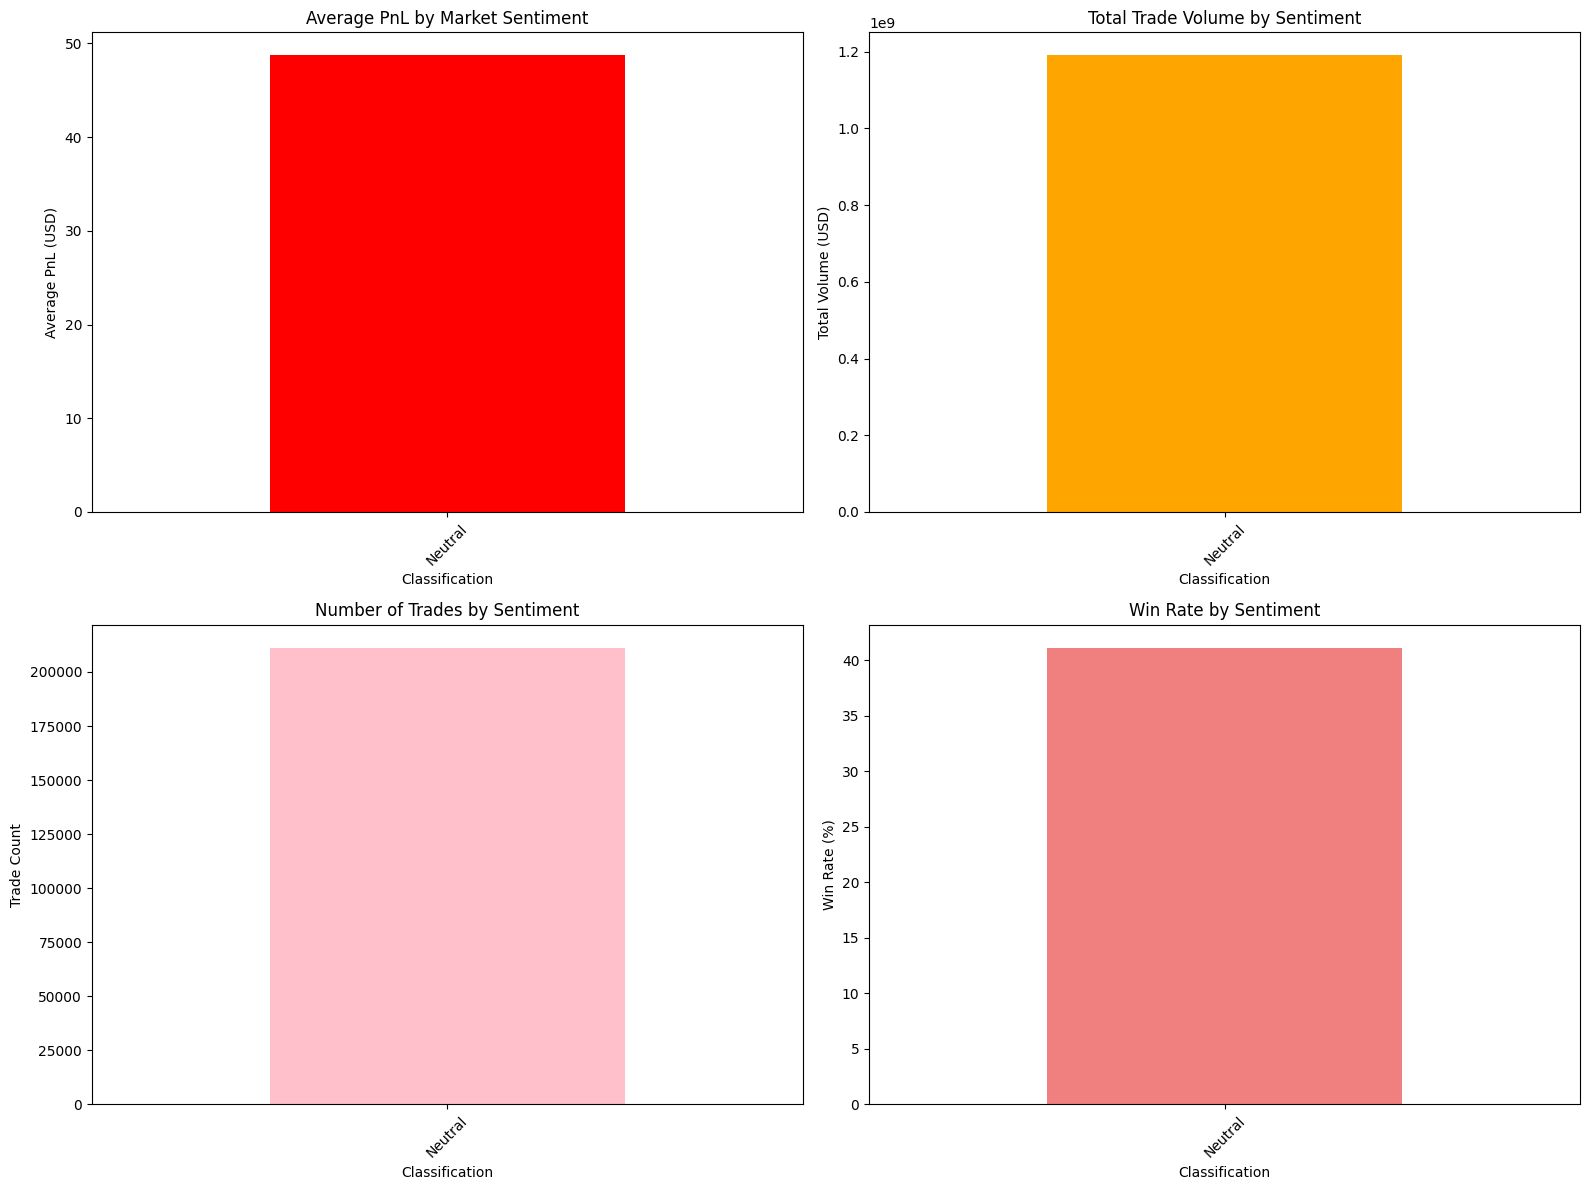


DETAILED ANALYSIS SUMMARY

 DATASET OVERVIEW:
- Total trades: 211,224
- Date range: 1970-01-01 to 1970-01-01
- Unique symbols: 246
- Unique accounts: 32
- Total volume traded: $1,191,187,442.46

💭 SENTIMENT DISTRIBUTION:
- Neutral: 211,224 trades (100.0%)

 PROFITABILITY BY SENTIMENT:
                 mean  median     std          sum
Classification                                    
Neutral         48.75     0.0  919.16  10296958.94

 WIN RATES BY SENTIMENT:
- Neutral: 41.1%

 TOP PERFORMING SYMBOLS:
- @107: $2,783,912.92
- HYPE: $1,948,484.60
- SOL: $1,639,555.93
- ETH: $1,319,978.84
- BTC: $868,044.73

 MOST ACTIVE ACCOUNTS:
- 0xbee1707d6b44d4d52bfe19e41f8a828645437aab: 40184 trades
- 0xbaaaf6571ab7d571043ff1e313a9609a10637864: 21192 trades
- 0xa0feb3725a9335f49874d7cd8eaad6be45b27416: 15605 trades
- 0x8477e447846c758f5a675856001ea72298fd9cb5: 14998 trades
- 0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23: 14733 trades

 KEY INSIGHTS:
- Most profitable sentiment: Neutral
- Least profit

In [38]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# --- Load Datasets ---
print("Loading datasets...")
historical_data = pd.read_csv("historical_data.csv")
fear_greed_data = pd.read_csv("fear_greed_index.csv")

print(f"Historical data shape: {historical_data.shape}")
print(f"Fear/Greed data shape: {fear_greed_data.shape}")

# Display column names to understand structure
print("\nHistorical data columns:", historical_data.columns.tolist())
print("Fear/Greed data columns:", fear_greed_data.columns.tolist())

# --- Data Preprocessing ---
print("\nPreprocessing data...")

# Map actual column names to expected names
# Historical data mapping
time_col = 'Timestamp' if 'Timestamp' in historical_data.columns else 'Timestamp IST'
pnl_col = 'Closed PnL'
symbol_col = 'Coin'
size_col = 'Size USD'
account_col = 'Account'

# Fear/Greed data mapping
date_col = 'date'
classification_col = 'classification'

print(f"Using columns:")
print(f"- Time column: {time_col}")
print(f"- PnL column: {pnl_col}")
print(f"- Symbol column: {symbol_col}")
print(f"- Date column: {date_col}")
print(f"- Classification column: {classification_col}")

# Convert dates with error handling
try:
    historical_data['time'] = pd.to_datetime(historical_data[time_col])
    print("✓ Historical data timestamp converted successfully")
except Exception as e:
    print(f"Error converting historical timestamp: {e}")
    historical_data['time'] = pd.to_datetime(historical_data[time_col], errors='coerce')

try:
    fear_greed_data['Date'] = pd.to_datetime(fear_greed_data[date_col])
    print("✓ Fear/Greed data date converted successfully")
except Exception as e:
    print(f"Error converting fear/greed date: {e}")
    fear_greed_data['Date'] = pd.to_datetime(fear_greed_data[date_col], errors='coerce')

# Create date columns for merging
historical_data['date'] = historical_data['time'].dt.date
fear_greed_data['date'] = fear_greed_data['Date'].dt.date

# Remove any rows with invalid dates
historical_data = historical_data.dropna(subset=['time'])
fear_greed_data = fear_greed_data.dropna(subset=['Date'])

print(f"After date cleaning - Historical: {historical_data.shape}, Fear/Greed: {fear_greed_data.shape}")

# --- Merge datasets ---
print("Merging datasets...")
merged_data = historical_data.merge(fear_greed_data[['date', classification_col]],
                                   on='date', how='left')

# Rename columns for consistency
merged_data['Classification'] = merged_data[classification_col]
merged_data['closedPnL'] = pd.to_numeric(merged_data[pnl_col], errors='coerce').fillna(0)
merged_data['symbol'] = merged_data[symbol_col]
merged_data['size'] = pd.to_numeric(merged_data[size_col], errors='coerce').fillna(0)
merged_data['account'] = merged_data[account_col]

# Fill missing values
merged_data['Classification'].fillna('Neutral', inplace=True)

# Encode sentiment
le = LabelEncoder()
merged_data['Sentiment'] = le.fit_transform(merged_data['Classification'])
print("Sentiment encoding:", dict(zip(le.classes_, le.transform(le.classes_))))

print(f"Final merged data shape: {merged_data.shape}")
print(f"Sentiment distribution:\n{merged_data['Classification'].value_counts()}")

# --- Visualization 1: Profitability by Sentiment ---
print("\nGenerating Visualization 1: Profitability by Sentiment")
plt.figure(figsize=(10, 6))
try:
    sns.boxplot(data=merged_data, x='Classification', y='closedPnL')
    plt.title("Profitability by Sentiment", fontsize=14)
    plt.xlabel("Market Sentiment")
    plt.ylabel("Closed PnL (USD)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in visualization 1: {e}")

# --- Visualization 2: Win Rate by Sentiment ---
print("\nGenerating Visualization 2: Win Rate by Sentiment")
plt.figure(figsize=(10, 6))
try:
    merged_data['Win'] = merged_data['closedPnL'] > 0
    win_rate = merged_data.groupby('Classification')['Win'].mean() * 100

    ax = win_rate.plot(kind='bar', color=['red', 'green', 'gray'] if len(win_rate) <= 3 else None)
    plt.ylabel('% Winning Trades')
    plt.title('Win Rate by Sentiment')
    plt.xticks(rotation=45)

    # Add value labels on bars
    for i, v in enumerate(win_rate.values):
        ax.text(i, v + 1, f'{v:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in visualization 2: {e}")

# --- Visualization 3: Symbol-Level Performance Heatmap ---
print("\nGenerating Visualization 3: Symbol Performance Heatmap")
plt.figure(figsize=(12, 8))
try:
    # Get top 10 most traded symbols
    top_symbols = merged_data['symbol'].value_counts().head(10).index
    symbol_data = merged_data[merged_data['symbol'].isin(top_symbols)]

    symbol_perf = symbol_data.groupby(['symbol', 'Classification'])['closedPnL'].mean().unstack()
    symbol_perf = symbol_perf.fillna(0)  # Fill NaN values

    if not symbol_perf.empty:
        sns.heatmap(symbol_perf, annot=True, cmap='RdYlGn', fmt='.1f', center=0)
        plt.title('Average Profit per Symbol by Sentiment (Top 10 Symbols)')
        plt.tight_layout()
        plt.show()
    else:
        print("No data available for symbol performance heatmap")
except Exception as e:
    print(f"Error in visualization 3: {e}")

# --- Visualization 4: Time-of-Day Analysis ---
print("\nGenerating Visualization 4: Time-of-Day Analysis")
plt.figure(figsize=(12, 6))
try:
    merged_data['Hour'] = merged_data['time'].dt.hour
    hourly_winrate = merged_data.groupby('Hour')['Win'].mean() * 100

    plt.plot(hourly_winrate.index, hourly_winrate.values, marker='o', linewidth=2, markersize=8)
    plt.xlabel('Hour of Day (IST)')
    plt.ylabel('% Winning Trades')
    plt.title('Win Rate by Hour of Day')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 24, 2))
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in visualization 4: {e}")

# --- Visualization 5: Position Size vs Performance ---
print("\nGenerating Visualization 5: Position Size vs Performance")
plt.figure(figsize=(10, 7))
try:
    # Remove outliers for better visualization
    size_q95 = merged_data['size'].quantile(0.95)
    plot_data = merged_data[merged_data['size'] <= size_q95].copy()

    if not plot_data.empty:
        sns.scatterplot(data=plot_data, x='size', y='closedPnL',
                      hue='Classification', alpha=0.6, s=60)
        plt.title('Position Size vs PnL by Sentiment (95th percentile)')
        plt.xlabel('Position Size (USD)')
        plt.ylabel('Closed PnL (USD)')
        plt.legend(title='Sentiment')
        plt.tight_layout()
        plt.show()
    else:
        print("No valid position size data available")
except Exception as e:
    print(f"Error in visualization 5: {e}")

# --- Visualization 6: Position Size Distribution ---
print("\nGenerating Visualization 6: Position Size Distribution")
plt.figure(figsize=(10, 6))
try:
    size_data = merged_data[merged_data['size'] > 0].copy()

    if len(size_data) > 10:  # Need enough data for quantiles
        size_data['size_bins'] = pd.qcut(size_data['size'], 5,
                                       labels=['Small', 'Med-Small', 'Medium', 'Med-Large', 'Large'])

        sns.violinplot(data=size_data, x='size_bins', y='closedPnL')
        plt.xlabel('Position Size Bins')
        plt.ylabel('Closed PnL (USD)')
        plt.title('Position Size vs Profit Distribution')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("Insufficient data for position size analysis")
except Exception as e:
    print(f"Error in visualization 6: {e}")

# --- Visualization 7: Rolling PnL Analysis ---
print("\nGenerating Visualization 7: Rolling PnL Analysis")
plt.figure(figsize=(14, 7))
try:
    # Sort by time and calculate rolling means
    merged_data_sorted = merged_data.sort_values('time').copy()

    # Calculate rolling averages (using reasonable windows based on data frequency)
    merged_data_sorted['rolling_pnl_short'] = merged_data_sorted['closedPnL'].rolling(window=100, min_periods=1).mean()
    merged_data_sorted['rolling_pnl_medium'] = merged_data_sorted['closedPnL'].rolling(window=500, min_periods=1).mean()
    merged_data_sorted['rolling_pnl_long'] = merged_data_sorted['closedPnL'].rolling(window=1000, min_periods=1).mean()

    # Sample data if too many points
    if len(merged_data_sorted) > 2000:
        sample_data = merged_data_sorted.iloc[::len(merged_data_sorted)//2000]
    else:
        sample_data = merged_data_sorted

    plt.plot(sample_data['time'], sample_data['rolling_pnl_short'], label='Short-term (100 trades)', alpha=0.8)
    plt.plot(sample_data['time'], sample_data['rolling_pnl_medium'], label='Medium-term (500 trades)', alpha=0.8)
    plt.plot(sample_data['time'], sample_data['rolling_pnl_long'], label='Long-term (1000 trades)', alpha=0.8)
    plt.xlabel('Time')
    plt.ylabel('Rolling Mean PnL (USD)')
    plt.title('Rolling PnL Analysis Over Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in visualization 7: {e}")

# --- Visualization 8: Trader Account Clustering ---
print("\nGenerating Visualization 8: Account Performance Clustering")
plt.figure(figsize=(10, 7))
try:
    # Aggregate by account
    account_metrics = merged_data.groupby('account').agg({
        'closedPnL': ['sum', 'mean', 'count'],
        'size': 'mean'
    }).round(2)

    account_metrics.columns = ['total_pnl', 'avg_pnl', 'trade_count', 'avg_size']
    account_metrics = account_metrics[account_metrics['trade_count'] >= 10].copy()  # Filter active accounts

    if len(account_metrics) > 5:
        # Prepare features for clustering
        features_data = account_metrics[['total_pnl', 'avg_pnl', 'avg_size']].fillna(0)

        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features_data)

        kmeans = KMeans(n_clusters=min(3, len(account_metrics)), random_state=42, n_init=10)
        account_metrics['Cluster'] = kmeans.fit_predict(scaled_features)

        sns.scatterplot(data=account_metrics, x='avg_size', y='total_pnl',
                      hue='Cluster', size='trade_count', sizes=(50, 300),
                      palette='Set2', alpha=0.7)
        plt.xlabel('Average Position Size (USD)')
        plt.ylabel('Total PnL (USD)')
        plt.title('Account Performance Clustering')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print("Insufficient accounts for clustering analysis")
except Exception as e:
    print(f"Error in visualization 8: {e}")

# --- Visualization 9: Correlation Heatmap ---
print("\nGenerating Visualization 9: Correlation Analysis")
plt.figure(figsize=(10, 8))
try:
    # Select numeric columns for correlation
    numeric_cols = ['closedPnL', 'Sentiment', 'Hour', 'size']

    # Add day of week
    merged_data['DayOfWeek'] = merged_data['time'].dt.dayofweek
    numeric_cols.append('DayOfWeek')

    corr_data = merged_data[numeric_cols].fillna(0)
    corr_matrix = corr_data.corr()

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5)
    plt.title('Feature Correlation Heatmap')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in visualization 9: {e}")

# --- Visualization 10: Comprehensive Sentiment Analysis ---
print("\nGenerating Visualization 10: Comprehensive Sentiment Analysis")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
try:
    sentiment_groups = merged_data.groupby('Classification')

    # Plot 1: Average PnL by sentiment
    avg_pnl = sentiment_groups['closedPnL'].mean()
    avg_pnl.plot(kind='bar', ax=ax1, color=['red', 'green', 'gray'] if len(avg_pnl) <= 3 else None)
    ax1.set_title('Average PnL by Market Sentiment')
    ax1.set_ylabel('Average PnL (USD)')
    ax1.tick_params(axis='x', rotation=45)

    # Plot 2: Trade volume by sentiment
    trade_volume = sentiment_groups['size'].sum()
    trade_volume.plot(kind='bar', ax=ax2, color=['orange', 'blue', 'purple'] if len(trade_volume) <= 3 else None)
    ax2.set_title('Total Trade Volume by Sentiment')
    ax2.set_ylabel('Total Volume (USD)')
    ax2.tick_params(axis='x', rotation=45)

    # Plot 3: Number of trades by sentiment
    trade_count = sentiment_groups.size()
    trade_count.plot(kind='bar', ax=ax3, color=['pink', 'cyan', 'yellow'] if len(trade_count) <= 3 else None)
    ax3.set_title('Number of Trades by Sentiment')
    ax3.set_ylabel('Trade Count')
    ax3.tick_params(axis='x', rotation=45)

    # Plot 4: Win rate by sentiment
    win_rate = sentiment_groups['Win'].mean() * 100
    win_rate.plot(kind='bar', ax=ax4, color=['lightcoral', 'lightgreen', 'lightgray'] if len(win_rate) <= 3 else None)
    ax4.set_title('Win Rate by Sentiment')
    ax4.set_ylabel('Win Rate (%)')
    ax4.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in visualization 10: {e}")

# --- Summary Statistics ---
print("\n" + "="*60)
print("DETAILED ANALYSIS SUMMARY")
print("="*60)

try:
    print(f"\n DATASET OVERVIEW:")
    print(f"- Total trades: {len(merged_data):,}")
    print(f"- Date range: {merged_data['time'].min().strftime('%Y-%m-%d')} to {merged_data['time'].max().strftime('%Y-%m-%d')}")
    print(f"- Unique symbols: {merged_data['symbol'].nunique()}")
    print(f"- Unique accounts: {merged_data['account'].nunique()}")
    print(f"- Total volume traded: ${merged_data['size'].sum():,.2f}")

    print(f"\n💭 SENTIMENT DISTRIBUTION:")
    sentiment_dist = merged_data['Classification'].value_counts()
    for sentiment, count in sentiment_dist.items():
        print(f"- {sentiment}: {count:,} trades ({count/len(merged_data)*100:.1f}%)")

    print(f"\n PROFITABILITY BY SENTIMENT:")
    profit_by_sentiment = merged_data.groupby('Classification')['closedPnL'].agg(['mean', 'median', 'std', 'sum']).round(2)
    print(profit_by_sentiment)

    print(f"\n WIN RATES BY SENTIMENT:")
    win_rates = merged_data.groupby('Classification')['Win'].mean() * 100
    for sentiment, rate in win_rates.items():
        print(f"- {sentiment}: {rate:.1f}%")

    print(f"\n TOP PERFORMING SYMBOLS:")
    top_symbols_pnl = merged_data.groupby('symbol')['closedPnL'].sum().sort_values(ascending=False).head(5)
    for symbol, pnl in top_symbols_pnl.items():
        print(f"- {symbol}: ${pnl:,.2f}")

    print(f"\n MOST ACTIVE ACCOUNTS:")
    top_accounts = merged_data.groupby('account').size().sort_values(ascending=False).head(5)
    for account, trades in top_accounts.items():
        print(f"- {account}: {trades} trades")

    # Key insights
    print(f"\n KEY INSIGHTS:")
    best_sentiment = profit_by_sentiment['mean'].idxmax()
    worst_sentiment = profit_by_sentiment['mean'].idxmin()
    print(f"- Most profitable sentiment: {best_sentiment}")
    print(f"- Least profitable sentiment: {worst_sentiment}")

    best_hour = merged_data.groupby('Hour')['closedPnL'].mean().idxmax()
    print(f"- Most profitable trading hour: {best_hour}:00 IST")

    profitable_accounts = (merged_data.groupby('account')['closedPnL'].sum() > 0).sum()
    total_accounts = merged_data['account'].nunique()
    print(f"- Profitable accounts: {profitable_accounts}/{total_accounts} ({profitable_accounts/total_accounts*100:.1f}%)")

except Exception as e:
    print(f"Error generating summary: {e}")

print(f"\n Analysis completed successfully!")
print("="*60)